<a href="https://colab.research.google.com/github/lapl13/MITxPro-DL-AI-ResearchWork/blob/main/Copy_of_Deep_Learning_Mastering_Neural_Networks_Module_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Mastering Neural Networks - Module 4 Asignment: CNN Classification of FashionMNIST Dataset

Now that we have Convolutional layers in our deep learning toolkit, we are going tackle a new and more challenging dataset - the [FashionMNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset. This dataset is in a similar format to the MNIST dataset, however it contains images of different articles of clothing.

In this assignment, we ask that you develop a CNN classifier that implements **at least 2** convolutional layers.

A template has been provided below with some starter code and please feel free to reuse any code you have written or seen before in previous notebooks!



In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.datasets
from torchvision import transforms
from torch.utils.data import Subset
from torch.utils.data import DataLoader
from torch.nn.modules.flatten import Flatten
import time, copy
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# device config (train our model on GPU if it is available which is much faster)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# These transforms will be performed on every datapoint - in this example we want to transform every
# datapoint to a Tensor datatype, and perform normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

# Notice how FashionMNIST is also built into PyTorch!
fashion_mnist_train = torchvision.datasets.FashionMNIST('', train=True, transform =transform, download=True)

# We will split out train dataset into train and validation!
fashion_mnist_train, fashion_mnist_val = torch.utils.data.random_split(fashion_mnist_train, [int(np.floor(len(fashion_mnist_train)*0.75)), int(np.ceil(len(fashion_mnist_train)*0.25))])

fashion_mnist_test = torchvision.datasets.FashionMNIST('', train=False, transform = transform, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw



In [ ]:
# We will create DataLoaders just like before with a batch size of 100
batch_size = 100
dataloaders = {'train': DataLoader(fashion_mnist_train, batch_size=batch_size),
               'val': DataLoader(fashion_mnist_val, batch_size=batch_size),
               'test': DataLoader(fashion_mnist_test, shuffle=True, batch_size=batch_size)}

dataset_sizes = {'train': len(fashion_mnist_train),
                 'val': len(fashion_mnist_val),
                 'test': len(fashion_mnist_test)}
print(f'dataset_sizes = {dataset_sizes}')

dataset_sizes = {'train': 45000, 'val': 15000, 'test': 10000}


## Visualization

Before we go any further, we want to visualize the different datapoints in our dataset. Similar to the MNIST datset, there are 10 different object classes and they map to the following labels:

* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot

Using the function below, we can visualize some of the different images that we will be working with from each class. Additionally, follow this [link](https://www.kaggle.com/datasets/zalando-research/fashionmnist) to find more information on the dataset.

In [ ]:
# plot a digit ground truth and autoencoding
def view_fashionmnist(label, count = 1):
    fig = plt.figure()
    idx = 1
    for inputs, labels in dataloaders["test"]:
        for i, input in enumerate(inputs):
            # we only want to view a certain class
            if (labels[i] != label):
                continue
            # plot the ground truth
            ax = fig.add_subplot(1, count, idx)
            input = input.cpu().detach().numpy().reshape((28,28))
            ax.imshow(input, cmap='gray')
            idx += 1
            if idx > count:
                break
        if idx > count:
            break

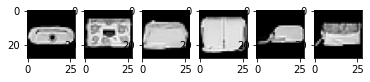

In [ ]:
# View 6 bags
view_fashionmnist(8, 6)

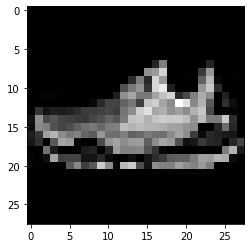

In [ ]:
# View 1 sneaker
view_fashionmnist(7, 1)

## Your Turn

Use what you have learned so far to develop a CNN classifier that implements **at least 2** convolutional layers.

In [ ]:
# Hint! Create a CNNClassifier class that implements a forward function

# class CNNClassifier(nn.Module):
#     def __init__(self):
#         super(CNNClassifier, self).__init__()
#         # Split the Encoder and Decoder

#         self.pipeline =

#     def forward(self, x):
#         return self.pipeline(x)


In [ ]:
# learning_rate =
# num_epochs =
# model =

In [ ]:
# Hint! Try reusing one of the training functions we have previously written
# def train_classification_model

In [ ]:
# loss and optimizer
# criterion =
# optimizer =
# scheduler =

# Make sure you save the training curves along the way for visualization afterwards!
# model, training_curves = train_classification_model(...)

### Visualizing Training Curves and Results

In [ ]:
# Utility functions for plotting your results!
def plot_training_curves(training_curves,
                         phases=['train', 'val', 'test'],
                         metrics=['loss','acc']):
    epochs = list(range(len(training_curves['train_loss'])))
    for metric in metrics:
        plt.figure()
        plt.title(f'Training curves - {metric}')
        for phase in phases:
            key = phase+'_'+metric
            if key in training_curves:
                if metric == 'acc':
                    plt.plot(epochs, [item.detach().cpu() for item in training_curves[key]])
                else:
                    plt.plot(epochs, training_curves[key])
        plt.xlabel('epoch')
        plt.legend(labels=phases)

def classify_predictions(model, device, dataloader):
    model.eval()   # Set model to evaluate mode
    all_labels = torch.tensor([]).to(device)
    all_scores = torch.tensor([]).to(device)
    all_preds = torch.tensor([]).to(device)
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = torch.softmax(model(inputs),dim=1)
        _, preds = torch.max(outputs, 1)
        scores = outputs[:,1]
        all_labels = torch.cat((all_labels, labels), 0)
        all_scores = torch.cat((all_scores, scores), 0)
        all_preds = torch.cat((all_preds, preds), 0)
    return all_preds.detach().cpu(), all_labels.detach().cpu(), all_scores.detach().cpu()

def plot_cm(model, device, dataloaders, phase='test'):
    class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    preds, labels, scores = classify_predictions(model, device, dataloaders[phase])

    cm = metrics.confusion_matrix(labels, preds)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    ax = disp.plot().ax_
    ax.set_title('Confusion Matrix -- counts')


In [ ]:
plot_training_curves(training_curves, phases=['train', 'val', 'test'])

In [ ]:
res = plot_cm(model, device, dataloaders, phase='test')

## Conclusions

Now that we have implemented our network we want to examine the results.

What class of object is most often misclassified? What class is it incorrectly classified as most often?

Additionally, try re-training your network with dropout included. Does this help the performance or is there a noticeable change in the ability of the model to generalize? Is the most commonly misclassified object still the same as with no dropout?